In [22]:
from pathlib import Path
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import math

In [23]:
def plot_histo(bin_edges, counts):
    """Uses matplotlib to graph a histogram based on output from numpy np.histogram()"""
    
    plt.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), edgecolor='black', align='edge')
    plt.yscale('log')
    # Add titles and labels
    plt.title('Histogram with Counts (Logarithmic Scale)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

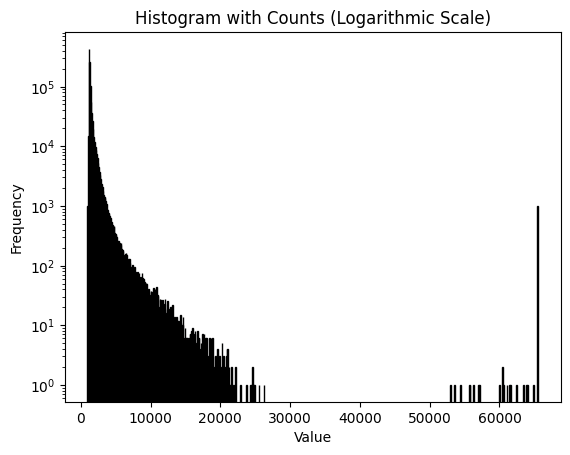

In [24]:
image = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1069.fits")
image = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1069.fits")
image = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw/d1069.fits")
image = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw/d1067.fits")  # Linear + plateau
# image = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw/d1068.fits")  # Linear + plateau
# image = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw/d1057.fits")
# image = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1054.fits")
# image = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1046.fits")
# image = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw/d1034.fits")
# image = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw/d1001.fits")
# image = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1073.fits")
# image = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw/d1032.fits")

bin_width = 100

with fits.open(image) as hdu:
    header = hdu[0].header
    data = hdu[0].data
    
    # number of pixels in image
    xsize = header['NAXIS1']
    # number of overscan columns
    cover = header['COVER']
    # Remove overscan portion
    data = data[0:,0:xsize-cover]
    
    # Calculate number of histogram bins, based on range of data
    minval = np.min(data)
    maxval = np.max(data)
    num_bins = int((maxval-minval)/bin_width) + 1
    
    # Create the histogram -- counts = frequency within each bin, bin_edges = values at bin boundaries
    counts, bin_edges = np.histogram(data, bins=num_bins, )
    
    # Plot histogram using matplotlib
    plot_histo(bin_edges, counts)

Fill the histogram bins with the actual pixel values that fall within their range

In [25]:
# Create a list to store the values in each bin
bins = [[] for _ in range(num_bins)]

# Assign each value to the corresponding bin
for row in data:
    for value in row:
        bin_index = int(np.floor((value - minval) / bin_width))
        bins[bin_index].append(value)

Create a histogram of all the values in just one bin

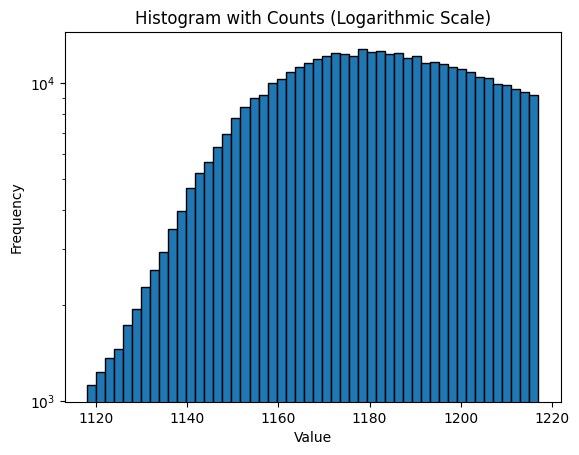

[1178.0380411080316, 23.038323315729684]

In [26]:
bin_to_analyze = np.argmax(counts)    # int(num_bins/2)
def analyze_bin(bin_index, plot=False):
    if plot:
        # Create the histogram -- counts = frequency within each bin, bin_edges = values at bin boundaries
        subcounts, subbin_edges = np.histogram(bins[bin_index], bins=int(bin_width/2), )
        # Plot histogram using matplotlib
        plot_histo(subbin_edges, subcounts)
    
    mean = np.mean(bins[bin_index])
    sd = np.std(bins[bin_index])
    return [mean, sd]

analyze_bin(bin_to_analyze, plot=True)

Find the mean and standard deviation for all bins

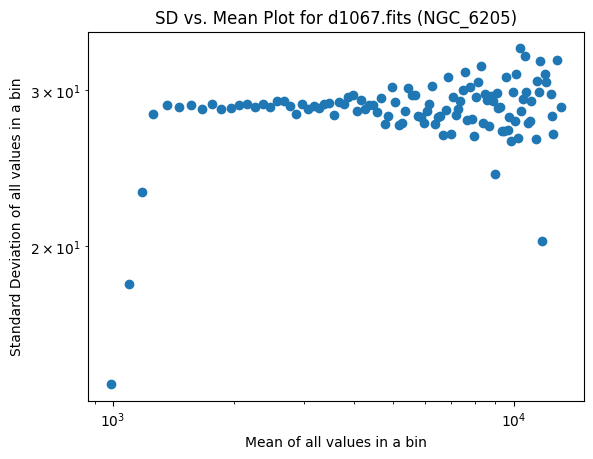

In [27]:
means = []
sds = []
for bin_index in range(len(bins)):
    if len(bins[bin_index]) > 20:
        mean, sd = analyze_bin(bin_index)
        if sd != 0:
            means.append(mean)
            sds.append(sd)

# Plot the scatter plot
plt.scatter(means, sds)
plt.xscale('log')
plt.yscale('log')
# Add titles and labels
plt.title(f'SD vs. Mean Plot for {image.name} ({header["OBJECT"]})')
plt.xlabel('Mean of all values in a bin')
plt.ylabel('Standard Deviation of all values in a bin')

# Show the plot
plt.show()

log(SD) = 2.90 log(mean) + -17.34


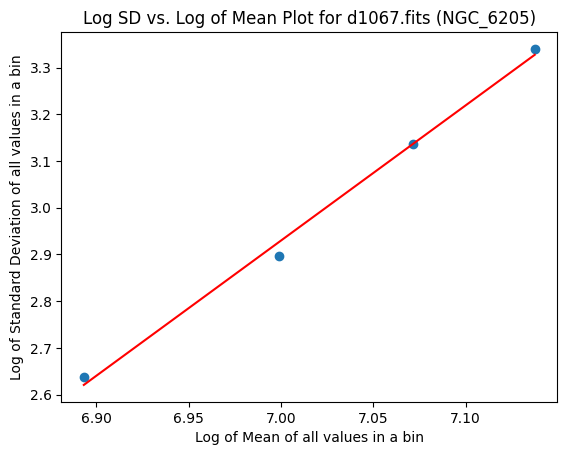

In [28]:
meanlogs = [math.log(mean) for mean in means]
sdlogs = [math.log(sd) for sd in sds]

meanlogs_linear = meanlogs[:4]
sdlogs_linear = sdlogs[:4]

# Calculate the line of best fit
coefficients = np.polyfit(meanlogs_linear, sdlogs_linear, 1)  # 1 means linear fit (degree 1)
polynomial = np.poly1d(coefficients)
line_of_best_fit = polynomial(meanlogs_linear)

print(f"log(SD) = {coefficients[0]:.2f} log(mean) + {coefficients[1]:.2f}")

# Plot the scatter plot
plt.scatter(meanlogs_linear, sdlogs_linear)
# Plot the line of best fit
plt.plot(meanlogs_linear, line_of_best_fit, color='red', label='Line of Best Fit')

# Add titles and labels
plt.title(f'Log SD vs. Log of Mean Plot for {image.name} ({header["OBJECT"]})')
plt.xlabel('Log of Mean of all values in a bin')
plt.ylabel('Log of Standard Deviation of all values in a bin')

# Show the plot
plt.show()

In [29]:
print(counts[:40])

[  1008  14751 426486 260704 100244  56012  36523  26787  19308  14314
  11936   9797   8493   7504   6462   5291   4536   3762   3284   2797
   2322   2079   1790   1543   1411   1332   1200   1063    900    867
    773    742    672    618    530    480    474    449    454    357]


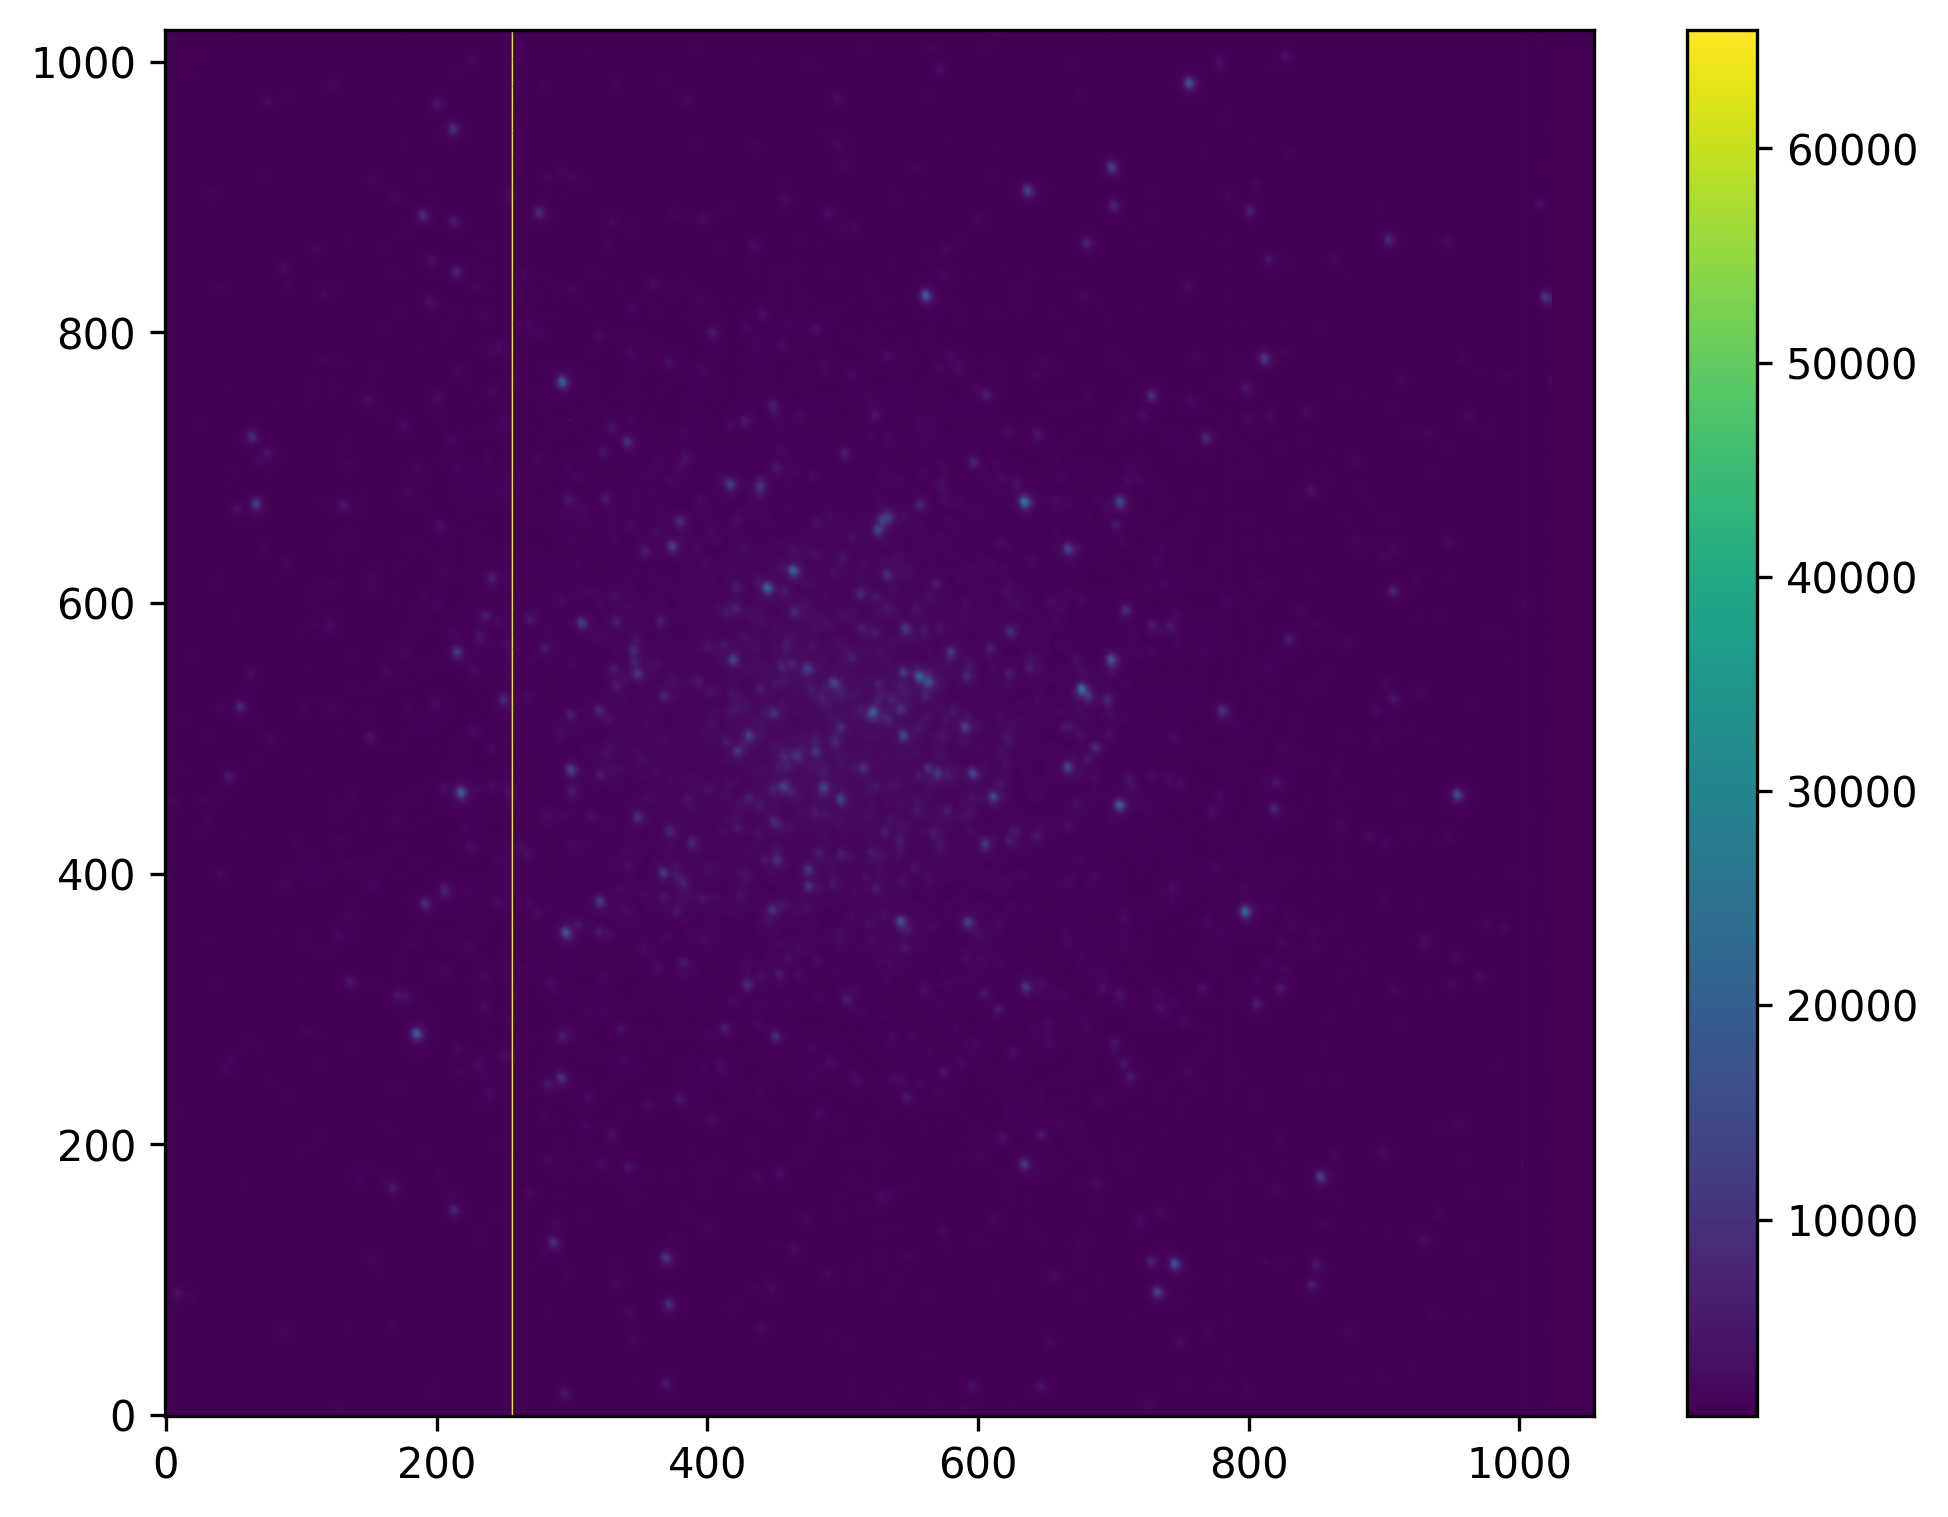

In [30]:
from display_fits import print_fits_info

print_fits_info(image)

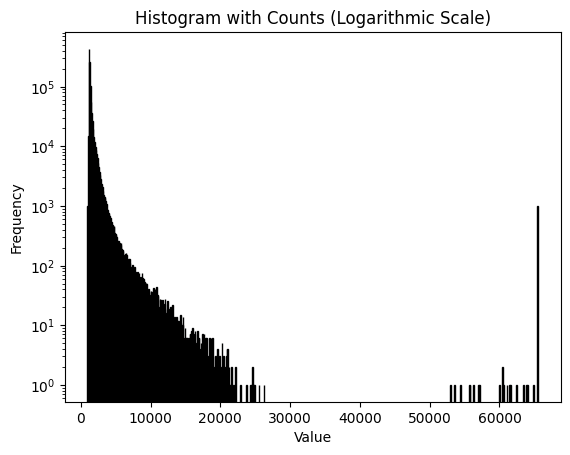

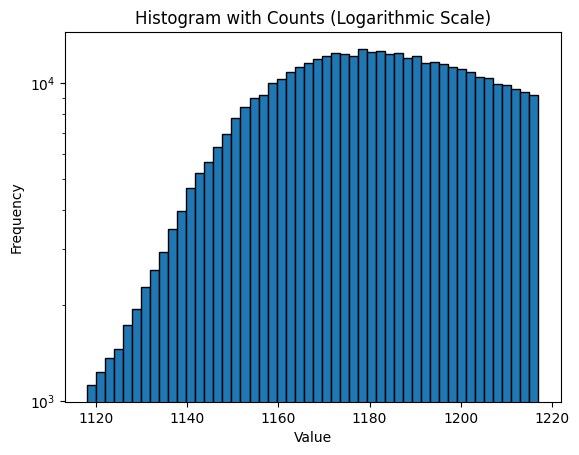

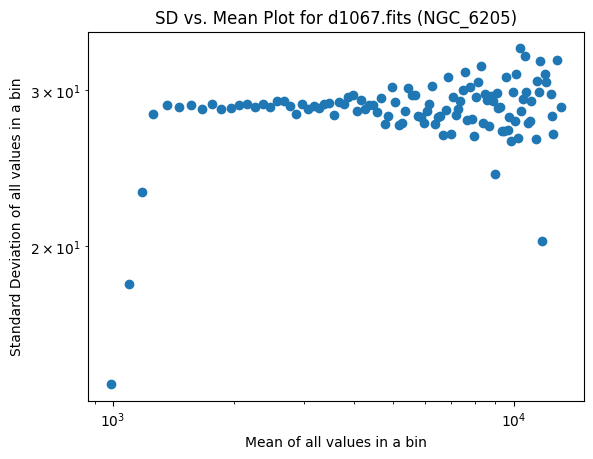

log(SD) = 2.90 log(mean) + -17.34


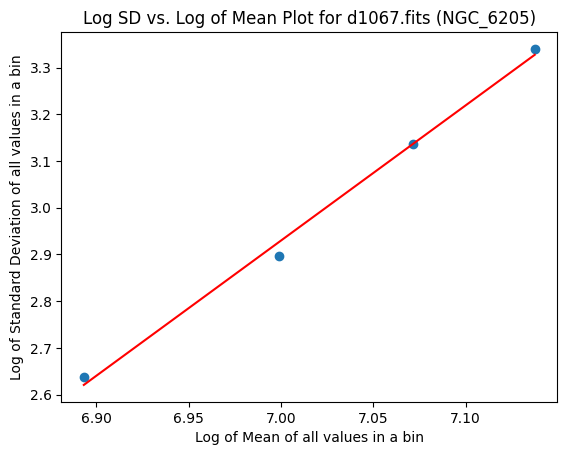

: 

In [31]:
from pathlib import Path
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import math

def plot_histo(bin_edges, counts):
    """Uses matplotlib to graph a histogram based on output from numpy np.histogram()"""
    
    plt.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), edgecolor='black', align='edge')
    plt.yscale('log')
    # Add titles and labels
    plt.title('Histogram with Counts (Logarithmic Scale)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()
    
def analyze_fits(image, bin_width=50):
    
    with fits.open(image) as hdu:
        header = hdu[0].header
        data = hdu[0].data
        
        # number of pixels in image
        xsize = header['NAXIS1']
        # number of overscan columns
        cover = header['COVER']
        # Remove overscan portion
        data = data[0:,0:xsize-cover]
        
        # Calculate number of histogram bins, based on range of data
        minval = np.min(data)
        maxval = np.max(data)
        num_bins = int((maxval-minval)/bin_width) + 1
        
        # Create the histogram -- counts = frequency within each bin, bin_edges = values at bin boundaries
        counts, bin_edges = np.histogram(data, bins=num_bins, )
        
        # Plot histogram using matplotlib
        plot_histo(bin_edges, counts)
        
    # Create a list to store the values in each bin
    bins = [[] for _ in range(num_bins)]
    # Assign each value to the corresponding bin
    for row in data:
        for value in row:
            bin_index = int(np.floor((value - minval) / bin_width))
            bins[bin_index].append(value)
            
    bin_to_analyze = np.argmax(counts)    # int(num_bins/2)
    def analyze_bin(bin_index, plot=False):
        if plot:
            # Create the histogram -- counts = frequency within each bin, bin_edges = values at bin boundaries
            subcounts, subbin_edges = np.histogram(bins[bin_index], bins=int(bin_width/2), )
            # Plot histogram using matplotlib
            plot_histo(subbin_edges, subcounts)
        
        mean = np.mean(bins[bin_index])
        sd = np.std(bins[bin_index])
        return [mean, sd]

    analyze_bin(bin_to_analyze, plot=True)
            
    means = []
    sds = []
    for bin_index in range(len(bins)):
        if len(bins[bin_index]) > 20:
            mean, sd = analyze_bin(bin_index)
            if sd != 0:
                means.append(mean)
                sds.append(sd)

    # Plot the scatter plot
    plt.scatter(means, sds)
    plt.xscale('log')
    plt.yscale('log')

    # Add titles and labels
    plt.title(f'SD vs. Mean Plot for {image.name} ({header["OBJECT"]})')
    plt.xlabel('Mean of all values in a bin')
    plt.ylabel('Standard Deviation of all values in a bin')

    # Show the plot
    plt.show()
    
    meanlogs = [math.log(mean) for mean in means]
    sdlogs = [math.log(sd) for sd in sds]

    meanlogs_linear = meanlogs[:4]
    sdlogs_linear = sdlogs[:4]

    # Calculate the line of best fit
    coefficients = np.polyfit(meanlogs_linear, sdlogs_linear, 1)  # 1 means linear fit (degree 1)
    polynomial = np.poly1d(coefficients)
    line_of_best_fit = polynomial(meanlogs_linear)

    print(f"log(SD) = {coefficients[0]:.2f} log(mean) + {coefficients[1]:.2f}")

    # Plot the scatter plot
    plt.scatter(meanlogs_linear, sdlogs_linear)
    # Plot the line of best fit
    plt.plot(meanlogs_linear, line_of_best_fit, color='red', label='Line of Best Fit')

    # Add titles and labels
    plt.title(f'Log SD vs. Log of Mean Plot for {image.name} ({header["OBJECT"]})')
    plt.xlabel('Log of Mean of all values in a bin')
    plt.ylabel('Log of Standard Deviation of all values in a bin')

    # Show the plot
    plt.show()
    
image = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw/d1067.fits")  # Linear + plateau

analyze_fits(image, bin_width=100)